In [3]:
!pip install sentence_transformers

  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached sentencepiece-0.1.99-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)


In [60]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('LLM_with_context.csv')

# Extract 'user_input' and 'output' columns as lists
user_input = df['user_input'].tolist()
output = df['output'].tolist()


In [13]:
#Cosine Analysis
from sentence_transformers import SentenceTransformer, util
import pathlib
import os

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')


In [61]:
embedding_user = model.encode(user_input, convert_to_tensor=False)
embedding_output=model.encode(output, convert_to_tensor=False)
cosine_scores = util.cos_sim(embedding_user, embedding_output)

d = {}
for i, v1 in enumerate(user_input):
    for j, v2 in enumerate(output):
        if i > j:
            continue
        d[v1 + ' vs. ' + v2] = cosine_scores[i][j].item()

# sort by score
d_sorted = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
d_sorted

{'I am a bit distracted due to family illness.  vs. Prioritize tasks and try to create small moments for self-care.': 0.4380817711353302,
 'I am an engineer and I am currently pursuing my Masters, but my grades are not good. vs. Have you considered talking to your professors or seeking additional support to improve?': 0.4272659420967102,
 'Hi, I am really upset I am not doing good in my career. vs. What is been challenging for you?': 0.36015254259109497,
 'Hi, I am really upset I am not doing good in my career. vs. Have you considered talking to your professors or seeking additional support to improve?': 0.34072932600975037,
 'I am an engineer and I am currently pursuing my Masters, but my grades are not good. vs. Consider discussing your situation with your professors for possible accommodations.': 0.33202940225601196,
 'My semester is running and I dont have time for any breaks.  vs. Prioritize tasks and try to create small moments for self-care.': 0.32794493436813354,
 'I am an engi

In [62]:
import json
with open('Cosval_Expert.json', 'w') as json_file:
    json.dump(d_sorted, json_file)

In [63]:
#Lexical Analysis
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import bigrams
length=0
count=0
unigram_count=0
bigram_count=0
conv=user_input+output
#Tokenizing
tokens=unigrams=bigrams_set=[]
for text in conv:
  tokens += word_tokenize(text)
  count+=1
lex_dict={}
lex_dict = {
    'avg_length': len(tokens)/count,
    'unique_unigrams': list(set(tokens)),
    'unique_bigrams': list(set(list(bigrams(tokens))))
}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:
with open('Lex_Expert.json', 'w') as json_file:
    json.dump(lex_dict, json_file)

In [88]:
import json
with open('Lex_without_context50.json', 'r') as json_file:
    data = json.load(json_file)
print(data['avg_length'])
print(len(data['unique_unigrams']))
print(len(data['unique_bigrams']))

12.214285714285714
84
128


In [78]:
# Extracting the values to plot
import matplotlib.pyplot as plt
with open('Cosval_with_context1.json', 'r') as json_file:
    data1 = json.load(json_file)
    l1=data1.values()

with open('Cosval_without_context1.json', 'r') as json_file:
    data2 = json.load(json_file)
    l2=data2.values()

with open('Cosval_with_context50.json', 'r') as json_file:
    data3 = json.load(json_file)
    l3=data3.values()

with open('Cosval_without_context50.json', 'r') as json_file:
    data4 = json.load(json_file)
    l4=data4.values()

with open('CosvalLLM_with_context1.json', 'r') as json_file:
    data5 = json.load(json_file)
    l5=data5.values()

with open('CosvalLLM_without_context1.json', 'r') as json_file:
    data6 = json.load(json_file)
    l6=data6.values()

with open('Cosval_Expert.json', 'r') as json_file:
    data7 = json.load(json_file)
    l7=data7.values()

box_dic={
    'Original Dataset': l7,
    'Our model(25k_with_context)': l1,
    'Our model(25k_without_context)': l2,
    'Our model(50k_with_context)': l3,
    'Our model(50k_without_context)': l4,
    'Llama(LLM_with_context)': l5,
    'Llama(LLM_without_context)': l6
}

# plt.figure(figsize=(8, 6))
# box = plt.boxplot(values, patch_artist=True)

# # Coloring the boxes
# colors = ['lightblue']  # You can specify colors here
# for patch, color in zip(box['boxes'], colors):
#     patch.set_facecolor(color)

# plt.title('Similarity Scores Box Plot')
# plt.ylabel('Similarity')
# plt.xticks([1], ['Pairwise Comparisons'])
# plt.grid(True)
# plt.show()

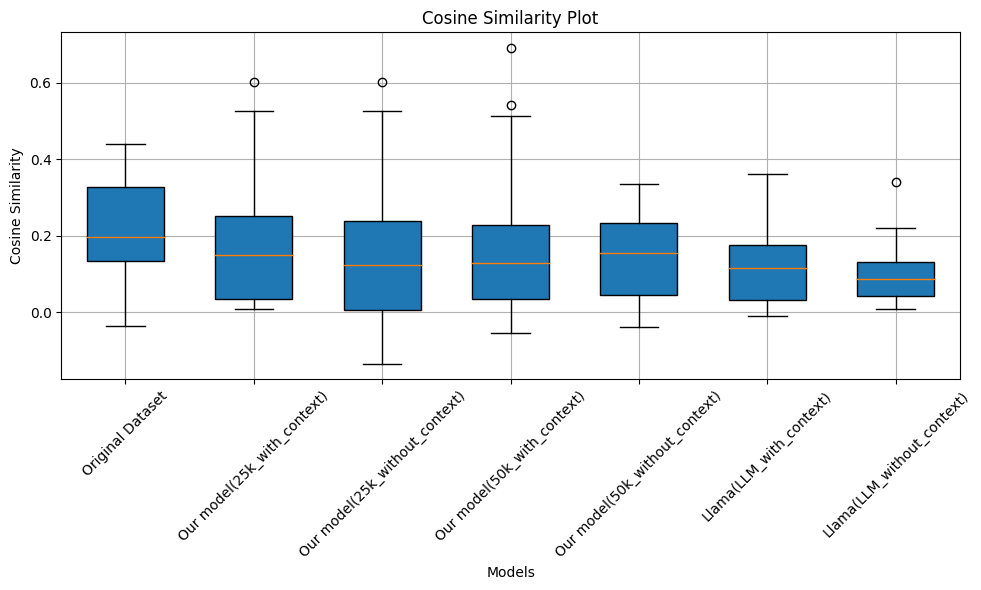

In [79]:
plt.figure(figsize=(10, 6))

# Plot box plots with intervals
positions = range(1, len(box_dic) + 1)
for i, (key, values) in enumerate(box_dic.items()):
    plt.boxplot(values, positions=[i + 1], widths=0.6, patch_artist=True, labels=[key])

# Customize plot properties
plt.title('Cosine Similarity Plot')
plt.ylabel('Cosine Similarity')
plt.xlabel('Models')

# Set x-axis labels as legends
plt.xticks(positions, box_dic.keys(), rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()